In [ ]:
! pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c cifar-10

 98% 698M/715M [00:05<00:00, 264MB/s]
100% 715M/715M [00:05<00:00, 138MB/s]


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
# extracting all the compressed files from the folder
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("successfully extracted all the file")

successfully extracted all the file


In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z   trainLabels.csv
kaggle.json   sampleSubmission.csv  train.7z


In [ ]:
! pip install py7zr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.3/141.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.9/412.9 kB 24.9 MB/s eta 0:00:00


In [ ]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z',mode='r')
archive.extractall()
archive.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [ ]:
# number of images our dataset contain
filenames = os.listdir('/content/train')
len(filenames)

50000

In [ ]:
type(filenames)

list

In [ ]:
# printing the first five file names
print(filenames[0:5])

['34319.png', '34492.png', '24623.png', '17833.png', '23099.png']


In [ ]:
# printing the last five files names
print(filenames[-5:])

['48392.png', '20013.png', '330.png', '27552.png', '34316.png']


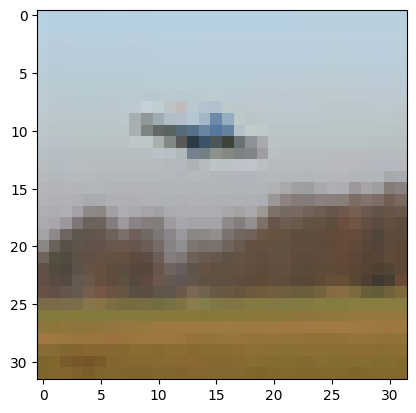

In [ ]:
# displaying the images using mtplotlib
img = mpimg.imread('/content/train/34319.png')
img_plot = plt.imshow(img)
plt.show()

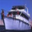

In [ ]:
# displaying the last images using cv2
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/train/34492.png')
cv2_imshow(img)

**Labels Processing**

In [ ]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [ ]:
# shape of the dataset
labels_df.shape

(50000, 2)

In [ ]:
# printing the first five rows
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
# printing the last five rows
labels_df.tail()

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [ ]:
# counting the number of different object
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [ ]:
# missing values
labels_df.isnull().sum()

,0
id,0
label,0


In [ ]:
labels_df[labels_df['id']==7796]

,id,label
7795,7796,frog


**Label** **Encoding**

In [ ]:
label_dict = {'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,
              'dog':5,'frog':6,'horse':7,'ship':8,'truck':9
}
label = [label_dict[i] for i in labels_df['label']]

In [ ]:
print(label[0:5])
print(label[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


In [ ]:
# converting the image into numpy array
from PIL import Image
img_path = '/content/train/'
id_list = list(labels_df['id'])

data = []

for id in id_list:

  image = Image.open(img_path + str(id) +'.png')
  image = np.array(image)
  data.append(image)

In [ ]:
for i in range(5):
  print(data[i])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[[[154 177 187]
  [126 137 136]
  [105 104  95]
  ...
  [ 91  95  71]
  [ 87  90  71]
  [ 79  81  70]]

 [[140 160 169]
  [145 153 154]
  [125 125 118]
  ...
  [ 96  99  78]
  [ 77  80  62]
  [ 71  73  61]]

 [[140 155 164]
  [139 146 149]
  [115 115 112]
  ...
  [ 79  82  64]
  [ 68  70  55]
  [ 67  69  55]]

 ...

 [[175 167 166]
  [156 154 160]
  [154 160 170]
  ..

In [ ]:
# type of data
type(data)

list

In [ ]:
# shape of the data
data[0].shape

(32, 32, 3)

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
# length of data
len(data)

50000

In [ ]:
# converting image list and label list to numpy array
X = np.array(data)           # image list
Y = np.array(label)          # labels list

In [ ]:
type(X)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Split**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


Scaling of data

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
print(X_train)

[[[[0.81960784 0.82352941 0.79607843]
   [0.83529412 0.83921569 0.81960784]
   [0.85490196 0.85882353 0.84313725]
   ...
   [0.49803922 0.29019608 0.15294118]
   [0.47843137 0.26666667 0.1372549 ]
   [0.45490196 0.24705882 0.1254902 ]]

  [[0.82352941 0.82352941 0.79215686]
   [0.83529412 0.83921569 0.81176471]
   [0.85490196 0.8627451  0.83921569]
   ...
   [0.48627451 0.2745098  0.1372549 ]
   [0.4745098  0.2627451  0.12941176]
   [0.48235294 0.27058824 0.14117647]]

  [[0.80784314 0.80392157 0.76470588]
   [0.81960784 0.81960784 0.79215686]
   [0.83529412 0.84313725 0.81960784]
   ...
   [0.48627451 0.2745098  0.14509804]
   [0.51372549 0.30196078 0.16470588]
   [0.51372549 0.30588235 0.16078431]]

  ...

  [[0.49803922 0.42352941 0.38039216]
   [0.54117647 0.47843137 0.43137255]
   [0.55294118 0.49803922 0.4627451 ]
   ...
   [0.61960784 0.58431373 0.5254902 ]
   [0.63137255 0.61176471 0.59215686]
   [0.53333333 0.5372549  0.58039216]]

  [[0.56862745 0.50980392 0.46666667]
   [0.5

**Building the Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 10

# setting up the layer of neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(64,activation ='relu'),
    keras.layers.Dense(num_of_classes,activation = 'softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compiling with the optimizer
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['acc']
              )

In [ ]:
# training the neural network
model.fit(X_train,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.2512 - loss: 2.0672 - val_acc: 0.3170 - val_loss: 1.8787
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.3451 - loss: 1.8339 - val_acc: 0.3672 - val_loss: 1.7600
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.3654 - loss: 1.7765 - val_acc: 0.3750 - val_loss: 1.7341
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - acc: 0.3723 - loss: 1.7648 - val_acc: 0.3692 - val_loss: 1.7451
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.3749 - loss: 1.7360 - val_acc: 0.3700 - val_loss: 1.7516
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - acc: 0.3793 - loss: 1.7301 - val_acc: 0.3695 - val_loss: 1.7241
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.3922 - loss: 1.7055 - val_acc: 0.3860 - val_loss: 1.6972
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.3946 - loss: 1.6957 - val_acc: 0.3755 - val_loss: 1.7127
Epoch 9/10
1125/1125 ━━━━━━━━━━━━━━━━━━━

**ResNet50**

In [ ]:
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

image is like a image database where models are trained

In [ ]:
convolutional_base = ResNet50(weights = 'imagenet',include_top= False,input_shape = (256,256,3))
convolutional_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))     # making the img size 256   # 32*2 = 64
model.add(layers.UpSampling2D((2,2)))     # 32*2 = 64,
model.add(layers.UpSampling2D((2,2)))     # 32*2 = 64
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes,activation = 'softmax'))

In [ ]:
model.compile(optimizer = optimizers.RMSprop(learning_rate = 2e-5),loss = 'sparse_categorical_crossentropy',metrics = ['acc'])

In [ ]:
history = model.fit(X_train,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 468s 363ms/step - acc: 0.3220 - loss: 2.0567 - val_acc: 0.7440 - val_loss: 0.8935
Epoch 2/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 405s 359ms/step - acc: 0.6544 - loss: 1.1004 - val_acc: 0.8813 - val_loss: 0.4736
Epoch 3/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 360ms/step - acc: 0.7972 - loss: 0.7652 - val_acc: 0.9212 - val_loss: 0.3283
Epoch 4/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 441s 359ms/step - acc: 0.8608 - loss: 0.5812 - val_acc: 0.9302 - val_loss: 0.2789
Epoch 5/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 360ms/step - acc: 0.9046 - loss: 0.4527 - val_acc: 0.9333 - val_loss: 0.2530
Epoch 6/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 441s 359ms/step - acc: 0.9309 - loss: 0.3549 - val_acc: 0.9355 - val_loss: 0.2387
Epoch 7/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 442s 359ms/step - acc: 0.9510 - loss: 0.2881 - val_acc: 0.9367 - val_loss: 0.2245
Epoch 8/10
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 404s 359ms/step - acc: 0.9652 - loss: 0.2307 - val_acc: 0.9413 - val_loss: 0.2173
Epoch 9/

In [ ]:
loss,accuracy = model.evaluate(X_test,Y_test)
print("test_accuracy = ",accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 116ms/step - acc: 0.9351 - loss: 0.2301
test_accuracy =  0.9368000030517578


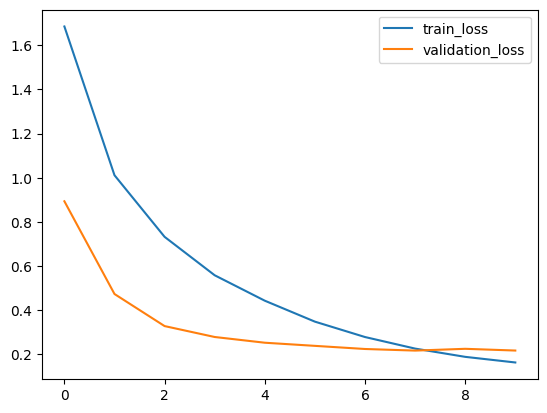

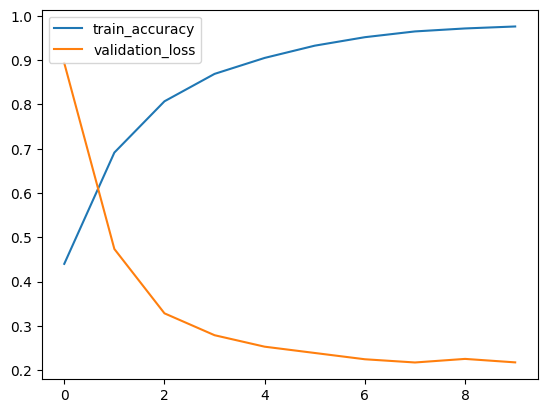

In [ ]:
h = history

# plot the loss value

plt.plot(h.history['loss'],label = 'train_loss')
plt.plot(h.history['val_loss'],label = 'validation_loss')
plt.legend()
plt.show()

# plot the accuracy value

plt.plot(h.history['acc'],label = 'train_accuracy')
plt.plot(h.history['val_loss'],label = 'validation_loss')
plt.legend()
plt.show()
